# Extracting a dataset preprocessed and ready for decoding (and other population analyses)

### 1. Extract DFallpa using this helper function

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper
animal = "Diego"
date = 230630
question = "PIG_BASE_saccade_fix_on" # holds variety of prepropoessing steps to clean data, specificalyl for PIG data.
list_time_windows = [(-0.6, 0.6)] # to slice data including just within this time window (realtive to events)
events_keep = ["00_fixon"]
combine_into_larger_areas = False
which_level = "saccade_fix_on"
SPIKES_VERSION = "tdt"

In [ ]:
# one way of doing it, but does not yet use SP._addSaccadeFixationColumns
# DFallpa = dfallpa_extraction_load_wrapper(animal, date, question, list_time_windows,
#                                     which_level=which_level,
#                                     events_keep = events_keep,
#                                     combine_into_larger_areas=combine_into_larger_areas,
#                                     HACK_RENAME_SHAPES=False,
#                                           SPIKES_VERSION=SPIKES_VERSION)

### For the above to work, you need to make the following work first

Searching using this string:
/home/kgg/mnt/Freiwald/ltian/recordings/*Diego*/*230630*/**
Found this many paths:
1
---
/home/kgg/mnt/Freiwald/ltian/recordings/Diego/230630/Diego-230630-124955
session:  0
Beh Sessions that exist on this date:  {230630: [(1, 'primsingridfixed6fDiego')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['primsingridfixed6fDiego']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/kgg/mnt/Freiwald/ltian/recordings/*Diego*/*230630*/**
Found this many paths:
1
---
/home/kgg/mnt/Freiwald/ltian/recordings/Diego/230630/Diego-230630-124955
{'filename_components_hyphened': ['Diego', '230630', '124955'], 'basedirs': ['/home/kgg/mnt/Freiwald/ltian/recordings/Diego', '/home/kgg/mnt/Freiwald/ltian/recordings/Diego/230630'], 'basedirs_filenames': ['230630', 'Diego-230630-124955'], 'filename_final_ext': 'Diego-230630-124955', 'filename_final_noext': 'Diego-230630-124955'}
FOund

600 _behclass_tokens_extract_datsegs
stored in self.Dat[BehClass]
Removing these trials: 
[]
self.Dat starting legnth:  648
Modified self.Dat, keeping only the inputted inds
self.Dat final legnth:  648
- starting/ending len (grouping params):
648
ADded new column: supervision_online
Appended self.Dat[superv_SEQUENCE_SUP]
Appended self.Dat[superv_SEQUENCE_ALPHA]
Appended self.Dat[superv_COLOR_ON]
Appended self.Dat[superv_COLOR_ITEMS_FADE_TO_DEFAULT_BINSTR]
Appended self.Dat[superv_COLOR_METHOD]
Appended self.Dat[superv_GUIDEDYN_ON]
Appended self.Dat[superv_VISUALFB_METH]
appended col to self.Dat:
supervision_stage_new
Appended self.Dat[superv_SEQUENCE_SUP]
Appended self.Dat[superv_COLOR_ON]
Appended self.Dat[superv_COLOR_METHOD]
Appended self.Dat[superv_COLOR_ITEMS_FADE_TO_DEFAULT_BINSTR]
Appended self.Dat[superv_GUIDEDYN_ON]
appended col to self.Dat:
supervision_stage_concise
Append column to self.Dat:  supervision_stage_semantic
Extracted into self.Dat[epoch_orig]
Modified self.Dat[ep

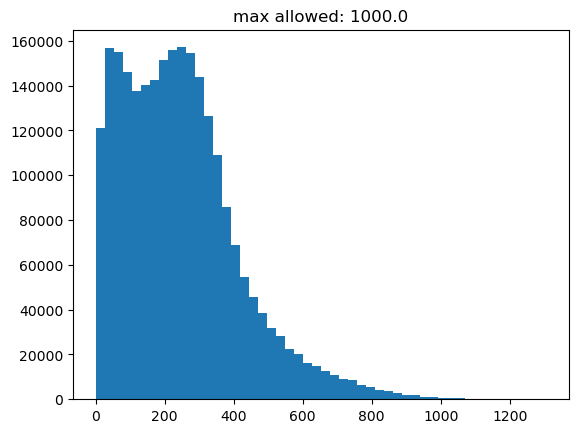

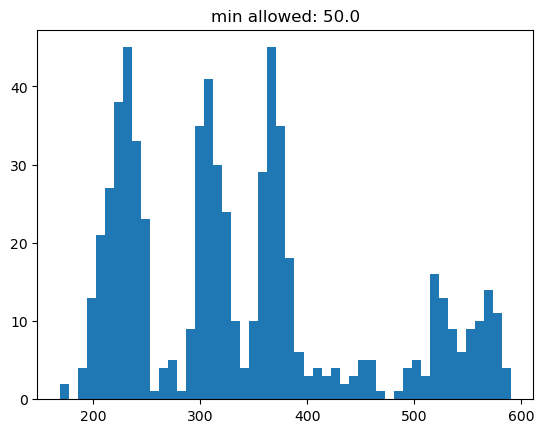

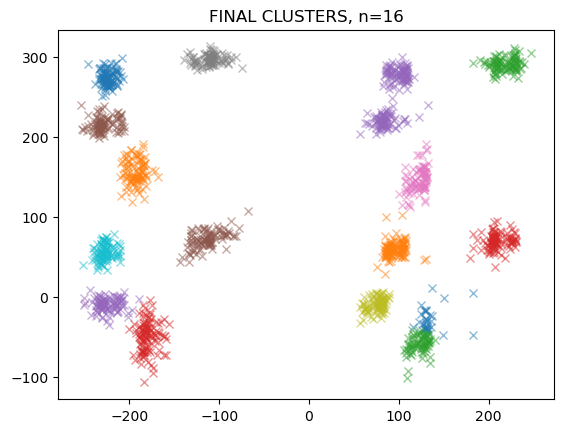

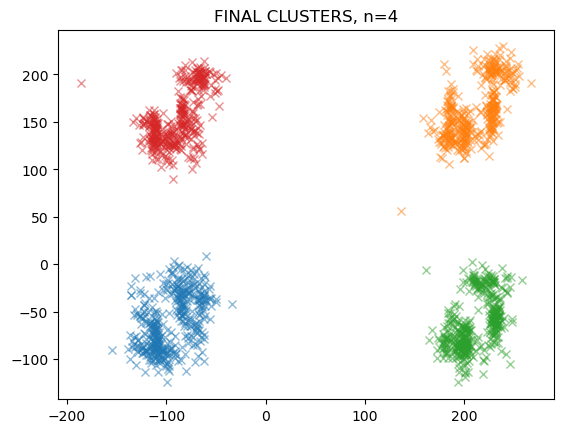

In [5]:
from neuralmonkey.classes.snippets import load_and_concat_mult_snippets
from neuralmonkey.classes.session import load_mult_session_helper

# You need to add to the code to have it generate snippets aligned to saccade fixations.
# You can come up with a new "which_level", e.g., 
which_level = "saccade_fix_on"

MS = load_mult_session_helper(date, animal, spikes_version=SPIKES_VERSION)
# for sn in MS.SessionsList:
#     sn.debug_mode_switch_to(sites=True,trials=True)

In [6]:
SP, SAVEDIR_ALL = load_and_concat_mult_snippets(MS, which_level = which_level, events_keep=events_keep)

** NOT SKIPPING EXTRACTION, since was not able to load snippets, for: 
(animal, DATE, which_level, session)
Diego 230630 saccade_fix_on 0
Starting length of D.Dat: 648
--BEFORE REMOVE; existing supervision_stage_concise:
off|0||1111|0    648
Name: supervision_stage_concise, dtype: int64
############ NOT PRUNING SUPERVISION TRIALS
Dataset final len: 648
*** RUNNING D.preprocessGood using these params:
['sanity_gridloc_identical']
-- Len of D, before applying this param: sanity_gridloc_identical, ... 648
Success! all gridloc identical!
These are the x and y mappings, gridloc:loc
x... {1: 1.7, -1: -1.6}
y... {1: 1.205, 0: -1.105}
after: 648
Kept these events:  ['fixon']

 == extarcating these sites:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 44, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 61, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 8

FileNotFoundError: [Errno 2] No such file or directory: '/home/kgg/Desktop/eyetracking_analyses/Diego-230630-0/230630-1-1-fixation-onsets.csv'

In [ ]:
ANALY_VER="seqcontext"
effect_vars = ["seqc_0_shape"]

# Run this early, before run further pruning stuff.
SP.datamod_append_outliers()

D, list_features_extraction = SP.datasetbeh_preprocess_clean_by_expt(
    ANALY_VER=ANALY_VER, vars_extract_append=effect_vars,
    substrokes_plot_preprocess=False,
    HACK_RENAME_SHAPES=False)

In [ ]:
# use SP to test _addSaccadeFixationColumns()
SP._addSaccadeFixationColumns()

In [ ]:
# Prune DFscalar -- keep only those within plannig period, and first fixation
print("Len DfScalar before remove unneeded rows: ", len(SP.DfScalar))
SP.DfScalar = SP.DfScalar[(SP.DfScalar["between-stimonset-and-go"] == True) & (SP.DfScalar["first-fixation-on-shape"]==True) & (SP.DfScalar["shape-fixation"]!='OFFSCREEN')].reset_index(drop=True)
print("Len DfScalar after remove unneeded rows: ", len(SP.DfScalar))

In [ ]:
pd.to_pickle(SP.DfScalar, "spdfscalar_Diego_230630.pkl")

In [ ]:
# Pull in features that you have not extracted (just in case somehow was skipped above)
assert(SP.datasetbeh_append_column_helper(list_features_extraction))

In [ ]:
# Add the features(variables) that you want to extract, related to saccades
list_features_extraction_sacc = ["seqc_0_shape", "seqc_0_loc", "seqc_1_shape", "seqc_1_loc", 
                            "seqc_2_shape", "seqc_2_loc", "seqc_3_shape", "seqc_3_loc",
                            "seqc_0_loc_on_clust", "seqc_1_loc_on_clust", "seqc_2_loc_on_clust", "seqc_3_loc_on_clust",
                            "trial_neural", "event_idx_within_trial", "between-stimonset-and-go",
                            "early-or-late-planning-period", "fixation-centroid",
                            "shape-fixation", "loc-fixation", "first-fixation-on-shape",
                            "shape-macrosaccade-index", "saccade-dir-angle", "saccade-dir-angle-bin",
                            "is-fixated-on-seqc0shape", "prev-shape-fixation", "prev-loc-fixation"] + list_features_extraction

In [ ]:
# For each desired feat, ensure it is in SP
for feat in list_features_extraction_sacc:
    assert feat in SP.DfScalar.columns

In [ ]:
# examine SP before last step of saving
SP.DfScalar['is-fixated-on-seqc0shape'].value_counts()

In [ ]:
# Split Snippets into separate PA for each brain region
from neuralmonkey.analyses.state_space_good import snippets_extract_popanals_split_bregion_twind

exclude_bad_areas = True

## Extract all popanals
DFallpa = snippets_extract_popanals_split_bregion_twind(SP, list_time_windows,
                                                list_features_extraction_sacc,
                                                combine_into_larger_areas=combine_into_larger_areas,
                                                events_keep=events_keep,
                                                exclude_bad_areas=exclude_bad_areas)


pd.to_pickle(DFallpa, "dfallpa_Pancho_230620.pkl")

### optionally, just load in

In [ ]:
# re-load in if not running again
path="/home/kgg/Desktop/neuralmonkey/neuralmonkey/notebooks_tutorials/dfallpa_Pancho_230623.pkl"
DFallpa = pd.read_pickle(path)

### normalize activity

In [ ]:
# Normalize activity optionally

fr_normalization_method = "each_time_bin"

if fr_normalization_method is not None:
    if fr_normalization_method=="each_time_bin":
        # Then demean in each time bin indepednently
        subtract_mean_at_each_timepoint = True
        subtract_mean_across_time_and_trial = False
    elif fr_normalization_method=="across_time_bins":
        # ALl time bins subtract the same scalar --> maintains temporal moudlation.
        subtract_mean_at_each_timepoint = False
        subtract_mean_across_time_and_trial = True
    else:
        print(fr_normalization_method)
        assert False

    from neuralmonkey.analyses.state_space_good import popanal_preprocess_scalar_normalization
    list_panorm = []

    for i, pa in enumerate(DFallpa["pa"].tolist()):
        path_to_save_example_fr_normalization = None
        if path_to_save_example_fr_normalization is not None and i==0:
            plot_example_chan_number = pa.Chans[0]
            if which_level=="trial":
                plot_example_split_var_string = "seqc_0_shape"
            elif which_level=="stroke":
                plot_example_split_var_string = "shape"
            else:
                plot_example_split_var_string = q_params["effect_vars"][0]
        else:
            plot_example_chan_number = None
            plot_example_split_var_string = None
        PAnorm, PAscal, PAscalagg, fig, axes, groupdict = popanal_preprocess_scalar_normalization(pa, None,
                                                                                          DO_AGG_TRIALS=False,
                                                                                          plot_example_chan_number=plot_example_chan_number,
                                                                                            plot_example_split_var_string = plot_example_split_var_string,
                                                                                          subtract_mean_at_each_timepoint=subtract_mean_at_each_timepoint,
                                                                                          subtract_mean_across_time_and_trial=subtract_mean_across_time_and_trial)
        if path_to_save_example_fr_normalization is not None and i==0:
            savefig(fig, path_to_save_example_fr_normalization)
        list_panorm.append(PAnorm)
    DFallpa["pa"] = list_panorm



# Quick description of DFallpa

In [ ]:
DFallpa

DFallpa holds population activity for each brain region. Each row is a single region. Each row has a "pa" object, which holds the population activity.

The data is in PA.X, in a matrix shape (nchans, ntrials, ntimes).

PA has many methods for manipulating, processing, and visualizing this population data.

Here, we will just pass PA into other function that take PA and do analyses, such as decoding.
    

### Example of stuff you can do with PA

##### Get a PA, just for example

In [ ]:
pa = DFallpa["pa"].values[0]

##### WHere the data is stored in pa

In [ ]:
# Neural data (nchans, ntrials, ntimes)
pa.X.shape

In [ ]:
# The labels for chans tirals and times
print(pa.Times)
print(pa.Chans)
print(pa.Trials)

In [ ]:
# Features associated with trials
pa.Xlabels["trials"][:10]

##### Some data manipulation

In [ ]:
# 1. First slice to time winodw, then take mean over time, i.e. a single time average
twind = (0.1, 0.5)
pa_sliced = pa.slice_by_dim_values_wrapper("times", twind)
pa_mean = pa_sliced.agg_wrapper("times")

print("Compare and see that times are binned")
print("-- original:", pa.Times, "... data shape: ", pa.X.shape)
print("-- sliced:", pa_sliced.Times, "... data shape: ", pa_sliced.X.shape)
print("-- mean:", pa_mean.Times, "... data shape: ", pa_mean.X.shape)


In [ ]:
# 2. binning time windows
binsize = 0.1
binslide = 0.1
pa_binned = pa.agg_by_time_windows_binned(binsize, binslide)
    
print("Compare and see that times are binned")
print("-- original:", pa.Times, "... data shape: ", pa.X.shape)
print("-- sliced:", pa_binned.Times, "... data shape: ", pa_binned.X.shape)


##### Some plotting

In [ ]:
pa.plotNeurHeat(0)

# Decoding

### PREPROCESS - factorize all relevant labels FIRST here.


In [ ]:
from neuralmonkey.analyses.decode_good import preprocess_factorize_class_labels_ints
MAP_LABELS_TO_INT = preprocess_factorize_class_labels_ints(DFallpa)

### 1) Default: Time-resolved decoding

In [ ]:
# simplest model

In [ ]:
SAVEDIR_ANALYSIS = "/tmp/decoding"
import os

In [ ]:
SAVEDIR = f"{SAVEDIR_ANALYSIS}/1_time_resolved"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

n_min_trials = 6

from neuralmonkey.analyses.decode_good import decodewrap_categorical_timeresolved_singlevar, decodewrapouterloop_categorical_timeresolved

# list_vars_decode = ["seqc_0_shape", "seqc_0_loc"]
# list_vars_decode = ["seqc_0_shape"]
list_vars_decode = ["seqc_0_shape"]
# list_vars_decode = ["seqc_2_shape"]
# list_vars_decode = ["shape_is_novel_all"]

# PARAMS
time_bin_size = 0.2 # binsize, to average over to get population vector of neural activity
slide = 0.2 # to slide the bin.
max_nsplits = 2 # n times to do cross-validation.

DFRES = decodewrapouterloop_categorical_timeresolved(DFallpa, list_vars_decode, SAVEDIR, time_bin_size, slide, n_min_trials,
                                                     max_nsplits=max_nsplits)


### 2) Cross-condition decoding

In [ ]:
# For each time bin, decode shape genearlizing across location

SAVEDIR = f"{SAVEDIR_ANALYSIS}/2_cross_condition_decoding"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

from neuralmonkey.analyses.decode_good import decodewrap_categorical_timeresolved_cross_condition, decodewrapouterloop_categorical_timeresolved_cross_condition

filtdict = None
separate_by_task_kind = True

# PARAMS

# Context
list_var_decode = [
    "seqc_0_shape",
    "seqc_0_shape",
    "shape-fixation",
    "shape-fixation",
    "is-fixated-on-seqc0shape",
    "is-fixated-on-seqc0shape",
    "is-fixated-on-seqc0shape",
    "is-fixated-on-seqc0shape",
    "is-fixated-on-seqc0shape",
    "is-fixated-on-seqc0shape",
]
list_vars_conj = [
    ["seqc_0_loc", "shape-fixation", "loc-fixation", "task_kind"],
    ["seqc_0_loc_on_clust", "shape-fixation", "loc-fixation", "task_kind"],
    ["loc-fixation", "seqc_0_shape", "seqc_0_loc", "task_kind"],
    ["loc-fixation", "seqc_0_shape", "seqc_0_loc_on_clust", "task_kind"],
    ["early-or-late-planning-period", "seqc_0_shape", "loc-fixation", "task_kind"],
    ["early-or-late-planning-period", "seqc_0_shape", "seqc_0_loc", "task_kind"],
    ["early-or-late-planning-period", "seqc_0_shape", "seqc_0_loc_on_clust", "task_kind"],
    ["early-or-late-planning-period", "shape-fixation", "loc-fixation", "task_kind"],
    ["early-or-late-planning-period", "shape-fixation", "seqc_0_loc", "task_kind"],
    ["early-or-late-planning-period", "seqc_0_shape", "seqc_0_loc_on_clust", "task_kind"],
]

time_bin_size = 0.2
slide = 0.2
subtract_mean_vars_conj = False
DFRES = decodewrapouterloop_categorical_timeresolved_cross_condition(DFallpa, list_var_decode,
                                                     list_vars_conj,
                                                     SAVEDIR, time_bin_size=time_bin_size, slide=slide,
                                                     subtract_mean_vars_conj=subtract_mean_vars_conj,
                                                                     filtdict=filtdict,
                                                                     separate_by_task_kind=separate_by_task_kind)



### 2b) Within-condition decoding. Separate decoder for each level of other var (then take average over decoders). Useful to controlling for variables

In [ ]:
from neuralmonkey.analyses.decode_good import decodewrapouterloop_categorical_timeresolved_within_condition

SAVEDIR = f"{SAVEDIR_ANALYSIS}/3_within_condition_decoding"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

# PARAMS

separate_by_task_kind = True

# Context
# Context
# list_var_decode = [
#     "seqc_0_shape",
# ]
# list_vars_conj = [
#     ["seqc_0_loc", "task_kind"], # minimal control
#     ]
filtdict = None
# filtdict = {
#     "stroke_index":[0,3,4,5,6,7,8],
# }

# RUns
max_nsplits = 2
time_bin_size = 0.2
slide = 0.2

# PARAMS
DFRES = decodewrapouterloop_categorical_timeresolved_within_condition(DFallpa, list_var_decode,
                                                     list_vars_conj,
                                                    SAVEDIR, time_bin_size=time_bin_size, slide=slide, filtdict=filtdict,
                                                                      separate_by_task_kind=separate_by_task_kind)


# Plots to visualize population activity (e.g, plot neural trajectories in lower dimensions, colored and split by variables of interest)

In [ ]:
DFallpa

In [ ]:
# Do PCA to plot projection to first 2 PCs
print(pa.X.shape)
print(twind)
X, pathis, _, _ = pa.dataextract_state_space_decode_flex(twind, pca_reduce=True)
print(X.shape)

# does PCA to reduce dimensionality, e.g. if channels are correlated
# squash data in twind to single scalar value

In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby
from neuralmonkey.classes.population_mult import extract_single_pa

DO_PCA = True

# Plot an example brain region's data.
bregion = "PMv_m"
twind = (-0.6, 0.6)
which_level = "flex"
event = "fixon"
pa = extract_single_pa(DFallpa, bregion, twind, which_level, event)

# INPUT PARAMS
var_color_by = "seqc_0_shape"
var_subplots = "loc-fixation"

# Runs

# 1) Construct dataframe
# df = pa.dataextract_split_by_label_grp_for_statespace(grpvars)
grpvars = [var_color_by, var_subplots]
if DO_PCA:
    X, _, _, _ = pa.dataextract_state_space_decode_flex(twind)
    times = [0]
else:
    X = pa.X # (chans, trials, times)
    times = pa.Times
labels = pa.Xlabels["trials"].loc[:, grpvars] 
labelvars = grpvars
df = trajgood_construct_df_from_raw(X, times, labels, labelvars)

# 2) Plot
dims = (0,1) # pairs of dimensions to plot
times_to_mark = [0.] # you can mark specific times on the plot. here marks the 0. sec mark.
times_to_mark_markers = ["d"] # mark with a diamond ("d")
time_bin_size = 0.05 # to make plot easier to visaulize, you can bin in time.
trajgood_plot_colorby_splotby(df, var_color_by, var_subplots, dims, "traj", mean_over_trials=True,
                              times_to_mark = times_to_mark, times_to_mark_markers = times_to_mark_markers,
                              time_bin_size=time_bin_size)

In [ ]:
X, _, _, _ = pa.dataextract_state_space_decode_flex(twind)

X.shape



In [ ]:
X.shape
X = X.squeeze(axis=2).T
print(X.shape)

In [ ]:
# plots every tiral os can see distribution
from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_scalar_WRAPPER
var_color="seqc_0_shape"
savedir = "/tmp"
vars_subplot = ["early-or-late-planning-period"]

X, _, _, _ = pa.dataextract_state_space_decode_flex(twind)

X.shape
X = X.squeeze(axis=2).T
print(X.shape)

# pa_pca = pa.copy()
# pa_pca.X = X
dflab = pa.Xlabels["trials"]


trajgood_plot_colorby_splotby_scalar_WRAPPER(X, dflab, var_color, savedir, vars_subplot)

In [ ]:
print(X.shape)

paslice = pa.slice_by_dim_values_wrapper("times", [-0.25, 0.25])


In [ ]:
labels_keep = [sh for sh in paslice.Xlabels["trials"]["shape-fixation"].unique() if not sh=="OFFSCREEN"]

In [ ]:
paslice = paslice.slice_by_labels("trials", "shape-fixation", labels_keep)


In [ ]:
paslice.Xlabels["trials"][var_subplots].value_counts()

In [ ]:
paslice.Xlabels["trials"]["seqc_0_shape"].value_counts()

In [ ]:
vars_colors = []

# Same, but coloring by location

var_color_by = "seqc_0_shape"
# var_color_by = "shape-fixation"
var_subplots = "early-or-late-planning-period"

# 1) Construct dataframe
# df = pa.dataextract_split_by_label_grp_for_statespace(grpvars)
grpvars = [var_color_by, var_subplots]
X = paslice.X # (chans, trials, times)
labels = paslice.Xlabels["trials"].loc[:, grpvars] 
labelvars = grpvars
df = trajgood_construct_df_from_raw(X, paslice.Times, labels, labelvars)

# 2) Plot
dims = (0,1) # pairs of dimensions to plot
times_to_mark = [0.] # you can mark specific times on the plot. here marks the 0. sec mark.
times_to_mark_markers = ["d"] # mark with a diamond ("d")
time_bin_size = 0.02 # to make plot easier to visaulize, you can bin in time.
trajgood_plot_colorby_splotby(df, var_color_by, var_subplots, dims, "traj", mean_over_trials=True,
                              times_to_mark = times_to_mark, times_to_mark_markers = times_to_mark_markers,
                              time_bin_size=time_bin_size)

In [ ]:
fig,ax=plt.subplots()
paslice.plotwrapper_smoothed_fr_split_by_label("trials", "seqc_0_shape", plot_indiv=False, ax=ax, chan=pa.Chans[2])